Dimensions of the original grayscale image: (350, 333)
Dimensions of the binary image: (350, 333)


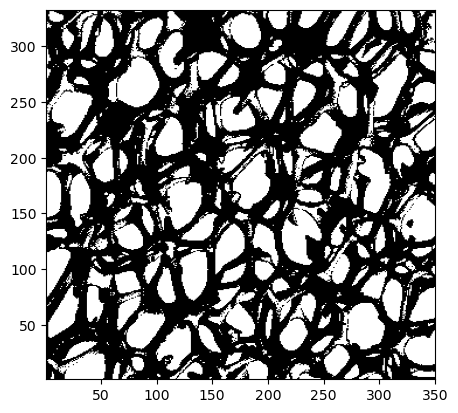

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#==============================================================================

# Loading the image
# image has to be grey scale

image_path = "D:\\Metal foam geometry\\2d\metalfoam.jpg"   
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#==============================================================================

# Converting to binary image (0 and 255)
# grey scale ranges from 0 to 255
# 0- black and 255- white
# 127 is the threshold value, above this is white and below this value is 1 

_, binary_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)   

#==============================================================================

# Converting to binary matrix (0 and 1)
binary_matrix_150 = (binary_img // 255).astype(np.int32)
exemplar=binary_matrix_150

length_x,length_y= exemplar.shape
#==============================================================================

# Save binary matrix to a text file
np.savetxt('binary_matrix_150.txt', binary_matrix_150, fmt='%d')
print(f"Dimensions of the original grayscale image: {img.shape}")
print(f"Dimensions of the binary image: {binary_img.shape}")
plt.imshow(exemplar, cmap='gray', origin='lower', extent=[1, 350, 1, 333])

In [3]:


# Example: 2D exemplar matrix (e.g., 350x330)
#exemplar = np.random.randint(0, 2, (300, 300))

# Neighborhood size (e.g., 5x5)
n = 10

length_x=exemplar.shape[0]
length_y=exemplar.shape[1]
#===========================================================neighborhood extraction=======================================================================
# Extracting all neighborhoods from the exemplar
def extract_neighborhoods(exemplar, n):
    neighborhoods = []
    positions = []
    
    for i in range(length_x - n + 1):
        for j in range(length_y - n + 1):
            neighborhood = exemplar[i:i+n, j:j+n]
            neighborhoods.append(neighborhood.flatten())
            positions.append((i, j))
    return np.array(neighborhoods), positions

neighborhoods, positions = extract_neighborhoods(exemplar, n)

#==========================================================================================================================================================

# function for local error

def local_error(n_s,n_r) :
    return np.sqrt(np.array(sum((n_s - n_r)**2)))

116550


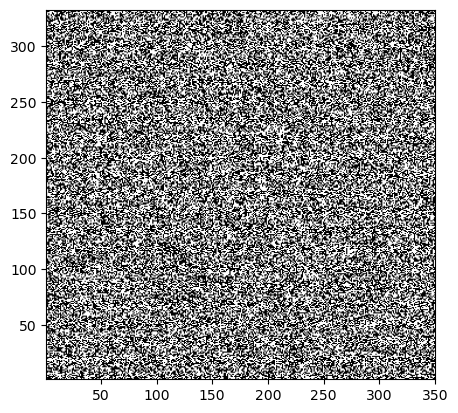

In [7]:
# initialization of reconstructed matrix of same porosity
num_ones = np.sum(exemplar)  


# Creating a flat array with the correct number of 1s and 0s
flat_array = np.array([1] * num_ones + [0] * (length_x * length_y - num_ones))

# Shuffle the array
np.random.shuffle(flat_array)

# Reshape it back to the original matrix shape
#reconstructed = flat_array.reshape((length_x, length_y))

reconstructed = np.random.randint(0, 2, (350, 333))
print(flat_array.size)
plt.imshow(reconstructed, cmap='gray', origin='lower', extent=[1, 350, 1, 333])

In [9]:
error1=local_error(reconstructed, exemplar)
print(error1)

[13.67479433 12.84523258 13.3041347  12.4498996  13.         13.56465997
 13.37908816 13.34166406 13.6381817  13.22875656 13.19090596 12.64911064
 13.67479433 12.72792206 13.78404875 13.34166406 13.60147051 14.17744688
 13.85640646 13.89244399 13.19090596 13.03840481 13.11487705 13.56465997
 12.84523258 13.49073756 13.6381817  13.         12.92284798 12.80624847
 13.37908816 13.3041347  12.9614814  13.         13.60147051 13.22875656
 13.37908816 13.41640786 13.37908816 13.22875656 13.85640646 13.22875656
 12.64911064 13.         12.72792206 13.74772708 13.03840481 12.56980509
 12.92284798 13.41640786 13.85640646 14.07124728 12.72792206 13.34166406
 13.26649916 13.15294644 12.36931688 13.41640786 14.         13.11487705
 13.15294644 12.88409873 13.3041347  13.6381817  12.84523258 13.41640786
 13.3041347  13.19090596 12.32882801 13.67479433 13.67479433 12.72792206
 13.34166406 13.07669683 13.96424004 13.26649916 12.92284798 13.03840481
 13.         13.         13.74772708 13.15294644 12

In [11]:
# Initialize FLANN
from pyflann  import FLANN
flann = FLANN()

# Build index for nearest neighbor search
flann.build_index(neighborhoods)


#reconstructed = np.random.randint(0, 2, (10, 10))
#reconstructed1=reconstructed
#plt.imshow(reconstructed1, cmap='gray', origin='lower', extent=[1, 350, 1, 335])
z=0
for iteration in range(100):  # Loop for 100 iterations
    for i in range(reconstructed.shape[0] - n + 1):
       for j in range(reconstructed.shape[1] - n + 1):
        # Extract the current neighborhood
            current_neighborhood = reconstructed[i:i+n, j:j+n].flatten()
        
        # Find the best matching neighborhood in the exemplar
            result, _ = flann.nn_index(current_neighborhood, 1)
        
        # Update the central pixel in the reconstructed matrix
            best_neighborhood = neighborhoods[result].reshape((n, n))
        
            reconstructed[i + n//2, j + n//2] = best_neighborhood[n//2, n//2]
    z=z+1

[13.3041347  13.6381817  13.67479433 13.82027496 13.15294644 10.86278049
 10.95445115 11.40175425 11.26942767 11.66190379 11.40175425 11.70469991
 11.66190379 12.24744871 12.76714533 13.03840481 13.37908816 13.19090596
 12.4498996  12.68857754 12.32882801 12.28820573 12.12435565 11.70469991
 11.66190379 11.95826074 12.24744871 12.40967365 12.28820573 12.28820573
 13.15294644 13.45362405 13.60147051 13.78404875 13.96424004 13.82027496
 13.67479433 13.74772708 13.07669683 12.92284798 13.7113092  13.67479433
 14.14213562 13.92838828 13.78404875 13.11487705 13.52774926 13.22875656
 13.11487705 13.60147051 13.7113092  13.49073756 13.15294644 13.37908816
 13.6381817  13.6381817  13.11487705 13.07669683 13.11487705 12.60952021
 12.20655562 12.56980509 12.56980509 12.52996409 12.80624847 12.92284798
 13.03840481 12.72792206 12.40967365 13.         12.72792206 13.11487705
 13.34166406 13.34166406 13.82027496 13.7113092  13.52774926 14.17744688
 13.92838828 14.59451952 13.7113092  13.7113092  14

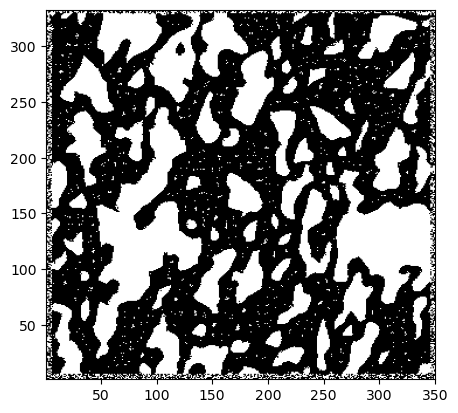

In [54]:
error2=local_error(reconstructed, exemplar)
plt.imshow(reconstructed, cmap='gray', origin='lower', extent=[1, 350, 1, 333])
print(error2)
print(z)

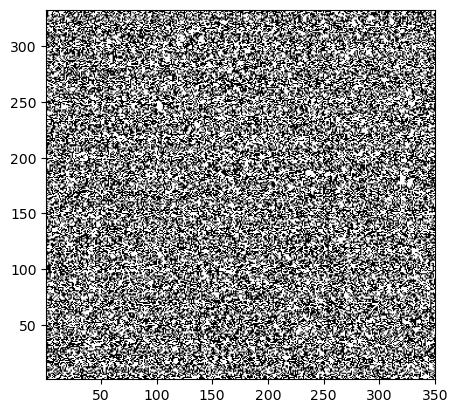

In [23]:
plt.imshow(reconstructed, cmap='gray', origin='lower', extent=[1, 350, 1, 333])

# Save the image
#plt.savefig('reconstructed_image.jpeg', bbox_inches='tight', dpi=600)

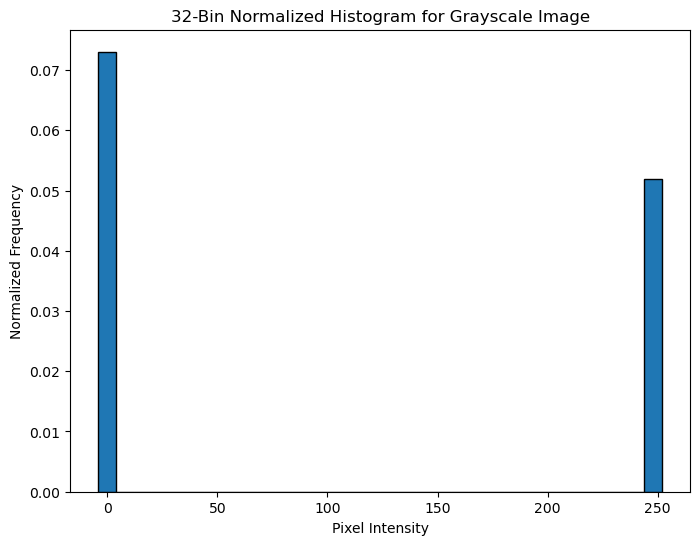

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
#image = cv2.imread('path_to_image.jpg', cv2.IMREAD_GRAYSCALE)

# Flatten the image array to 1D
pixels = binary_img.flatten()

# Calculate the histogram with 32 bins, range [0, 256), and normalize it
hist, bins = np.histogram(pixels, bins=32, range=[0, 256], density=True)

# Plot the normalized histogram
plt.figure(figsize=(8, 6))
plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), edgecolor='black')
plt.title('32-Bin Normalized Histogram for Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt


block_size = 8  # Size of the blocks to divide the matrix


# Initializing an array to store the position histogram
position_histogram = np.zeros((length_x,length_y))

# Calculate the histogram for each block
for i in range(length_x):
    for j in range(length_y):
        block = exemplar[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
        position_histogram[i, j] = np.sum(block) / block.size  # Density of 1s in the block

# the position histogram as a heatmap
plt.figure(figsize=(6, 6))
plt.imshow(position_histogram, cmap='hot', interpolation='nearest')

plt.colorbar(label='Density of 1s')
plt.title('Position Histogram of Foam Structure')
plt.show()

NameError: name 'length_x' is not defined